# PGA Tour 2019 EDA

## The Big Questions

One of my favorite Golf Digest segments is the *Undercover Tour Pro* series. The articles feature the opinions of anonymous PGA Tour players, giving insight into what really goes on inside the ropes. A while ago, I read such an article in which an undercover pro explained that most players on the PGA Tour are [only in it for the money.](https://www.golfdigest.com/story/undercover-tour-pro-2015-03) In short, the article explains that very few players are concerned about the history of it all, and what fans might remember of them 50 years after they retire. The rest, while they may love the game, grind day in and day out because, after all, it's their job. To a large degree, this article has inspired this project.

If a large number of PGA Tour players are most concerned with making cuts and keeping their tour card, I began to wonder about what exactly makes a player excel at just this. In this project, I will be exploring the playing statistics of PGA Tour players from the 2019 season to determine the putting characteristics of the best money earners on tour.

## Importing Libraries

In [35]:
# Linear algebra
import numpy as np

# Data processing
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Show lots of columns and rows in pandas
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 3000)

# Data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

## Loading the Data

In [5]:
dataset = pd.read_csv('2019_data.csv')

## Data Processing

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720529 entries, 0 to 9720528
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Player Name  object
 1   Date         object
 2   Statistic    object
 3   Variable     object
 4   Value        object
dtypes: object(5)
memory usage: 370.8+ MB


In [37]:
dataset.head()

,Player Name,Date,Statistic,Variable,Value
0,Cameron Champ,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),78
1,Rory McIlroy,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),72
2,Luke List,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),66
3,Dustin Johnson,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),73
4,Wyndham Clark,2019-08-25,Driving Distance,Driving Distance - (ROUNDS),87


In [38]:
dataset['Statistic'].nunique()

378

This is great. We have lots of variables to choose from (378 to be exact). We obviously won't need all of these, so I have narrowed down 20 statistics that appear to be representative of different abilities in golf, and then clean the data by removing NaN values, converting values to float, and renaming the column labels.

While the PGA Tour offers a plethora of different features, I focussed on ones that a PGA Tour player has more control over, and could potentially focus their efforts on to improve their performace, rather than statistics seemingly based on chance. For example, a player may have little control over changes in their putting performance from round two to round three, but it may be helpful to know whether driving distance or lag putting ability will help them earn the most money each week.

In [39]:
s1 = 'All-Around Ranking - (TOTAL)'
s2 = 'Average Approach Shot Distance - (AVG)'
s3 = 'Club Head Speed - (AVG.)'
s4 = 'Driving Distance - (AVG.)'
s5 = 'FedExCup Season Points - (POINTS)'
s6 = 'GIR Percentage from Fairway - (%)'
s7 = 'GIR Percentage from Other than Fairway - (%)'
s8 = 'Good Drive Percentage - (%)'
s9 = 'Greens in Regulation Percentage - (%)'
s10 = 'Hit Fairway Percentage - (%)'
s11 = 'Overall Putting Average - (AVG)'
s12 = 'Par 3 Scoring Average - (AVG)'
s13 = 'Par 4 Scoring Average - (AVG)'
s14 = 'Par 5 Scoring Average - (AVG)'
s15 = "Putting from - > 10' - (% MADE)"
s16 = "Putting from 4-8' - (% MADE)"
s17 = "3-Putt Avoidance > 25' - (%)"
s18 = 'Putts Per Round - (AVG)'
s19 = 'Sand Save Percentage - (%)'
s20 = 'Scrambling - (%)'

keep_stats = [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19, s20]

In [40]:
# Pare the dataset down to the 20 statistics
data = dataset.loc[dataset['Variable'].isin(keep_stats)]
data.head()

,Player Name,Date,Statistic,Variable,Value
188,Cameron Champ,2019-08-25,Driving Distance,Driving Distance - (AVG.),317.9
189,Rory McIlroy,2019-08-25,Driving Distance,Driving Distance - (AVG.),313.5
190,Luke List,2019-08-25,Driving Distance,Driving Distance - (AVG.),313.3
191,Dustin Johnson,2019-08-25,Driving Distance,Driving Distance - (AVG.),312.0
192,Wyndham Clark,2019-08-25,Driving Distance,Driving Distance - (AVG.),311.8


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129600 entries, 188 to 9687033
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Player Name  129600 non-null  object
 1   Date         129600 non-null  object
 2   Statistic    129600 non-null  object
 3   Variable     129600 non-null  object
 4   Value        129600 non-null  object
dtypes: object(5)
memory usage: 5.9+ MB


In [42]:
data['Value'] = data['Value'].replace('[\$,]', '', regex=True).astype(float)
data['Value'] = pd.to_numeric(data['Value'],errors='coerce')

In [43]:
data.isna().sum()

Player Name    0
Date           0
Statistic      0
Variable       0
Value          0
dtype: int64

We have no missing values, which is great. But, we can see that the formatting of the original csv isn't exactly conducive to analysis. We can change that by using a pivot table.

In [44]:
df = pd.pivot_table(data=data, index='Player Name', columns='Variable', values='Value')
df.head()

Variable,3-Putt Avoidance > 25' - (%),All-Around Ranking - (TOTAL),Average Approach Shot Distance - (AVG),Club Head Speed - (AVG.),Driving Distance - (AVG.),FedExCup Season Points - (POINTS),GIR Percentage from Fairway - (%),GIR Percentage from Other than Fairway - (%),Good Drive Percentage - (%),Greens in Regulation Percentage - (%),Hit Fairway Percentage - (%),Overall Putting Average - (AVG),Par 3 Scoring Average - (AVG),Par 4 Scoring Average - (AVG),Par 5 Scoring Average - (AVG),Putting from - > 10' - (% MADE),Putting from 4-8' - (% MADE),Putts Per Round - (AVG),Sand Save Percentage - (%),Scrambling - (%)
Player Name,,,,,,,,,,,,,,,,,,,,
Aaron Baddeley,7.107000,796.645161,166.173333,113.669000,287.096774,357.700000,77.197419,53.452581,81.562667,65.660968,56.355806,1.559548,3.014194,3.964839,4.701290,18.216129,70.513000,28.072258,54.674194,67.201935
Aaron Wise,11.356667,640.193548,170.206667,116.913000,303.816129,295.600000,80.489032,55.075161,83.105000,69.062258,62.305806,1.614290,2.946129,4.025806,4.569032,14.099677,64.028667,29.058065,45.523226,53.427097
Abraham Ancer,8.059667,580.612903,167.723333,112.179333,294.883871,497.333333,75.820000,57.717097,87.279333,68.089677,67.810000,1.594806,3.034839,3.961613,4.617742,15.709677,70.173333,28.707097,46.432581,64.098065
Adam Hadwin,12.133667,453.451613,166.536667,112.175333,291.706452,607.633333,79.042581,53.222903,85.460000,68.628387,65.362903,1.595742,3.061613,4.029032,4.498065,14.203871,67.184000,28.722581,55.612903,58.182258
Adam Long,8.772333,992.741935,165.803333,110.987667,292.438710,609.900000,75.499355,55.212581,84.760667,66.452258,63.375806,1.629742,3.074194,4.056774,4.671935,11.643871,67.519667,29.336129,45.997419,58.781613


In [47]:
df.isna().sum()

Variable
3-Putt Avoidance > 25' - (%)                    45
All-Around Ranking - (TOTAL)                    44
Average Approach Shot Distance - (AVG)          45
Club Head Speed - (AVG.)                        45
Driving Distance - (AVG.)                       44
FedExCup Season Points - (POINTS)               28
GIR Percentage from Fairway - (%)               57
GIR Percentage from Other than Fairway - (%)    39
Good Drive Percentage - (%)                     39
Greens in Regulation Percentage - (%)           39
Hit Fairway Percentage - (%)                    45
Overall Putting Average - (AVG)                 39
Par 3 Scoring Average - (AVG)                   39
Par 4 Scoring Average - (AVG)                   39
Par 5 Scoring Average - (AVG)                   39
Putting from - > 10' - (% MADE)                 45
Putting from 4-8' - (% MADE)                    47
Putts Per Round - (AVG)                         39
Sand Save Percentage - (%)                      39
Scrambling - (%)      

Our data is now ready for visualization and analysis.

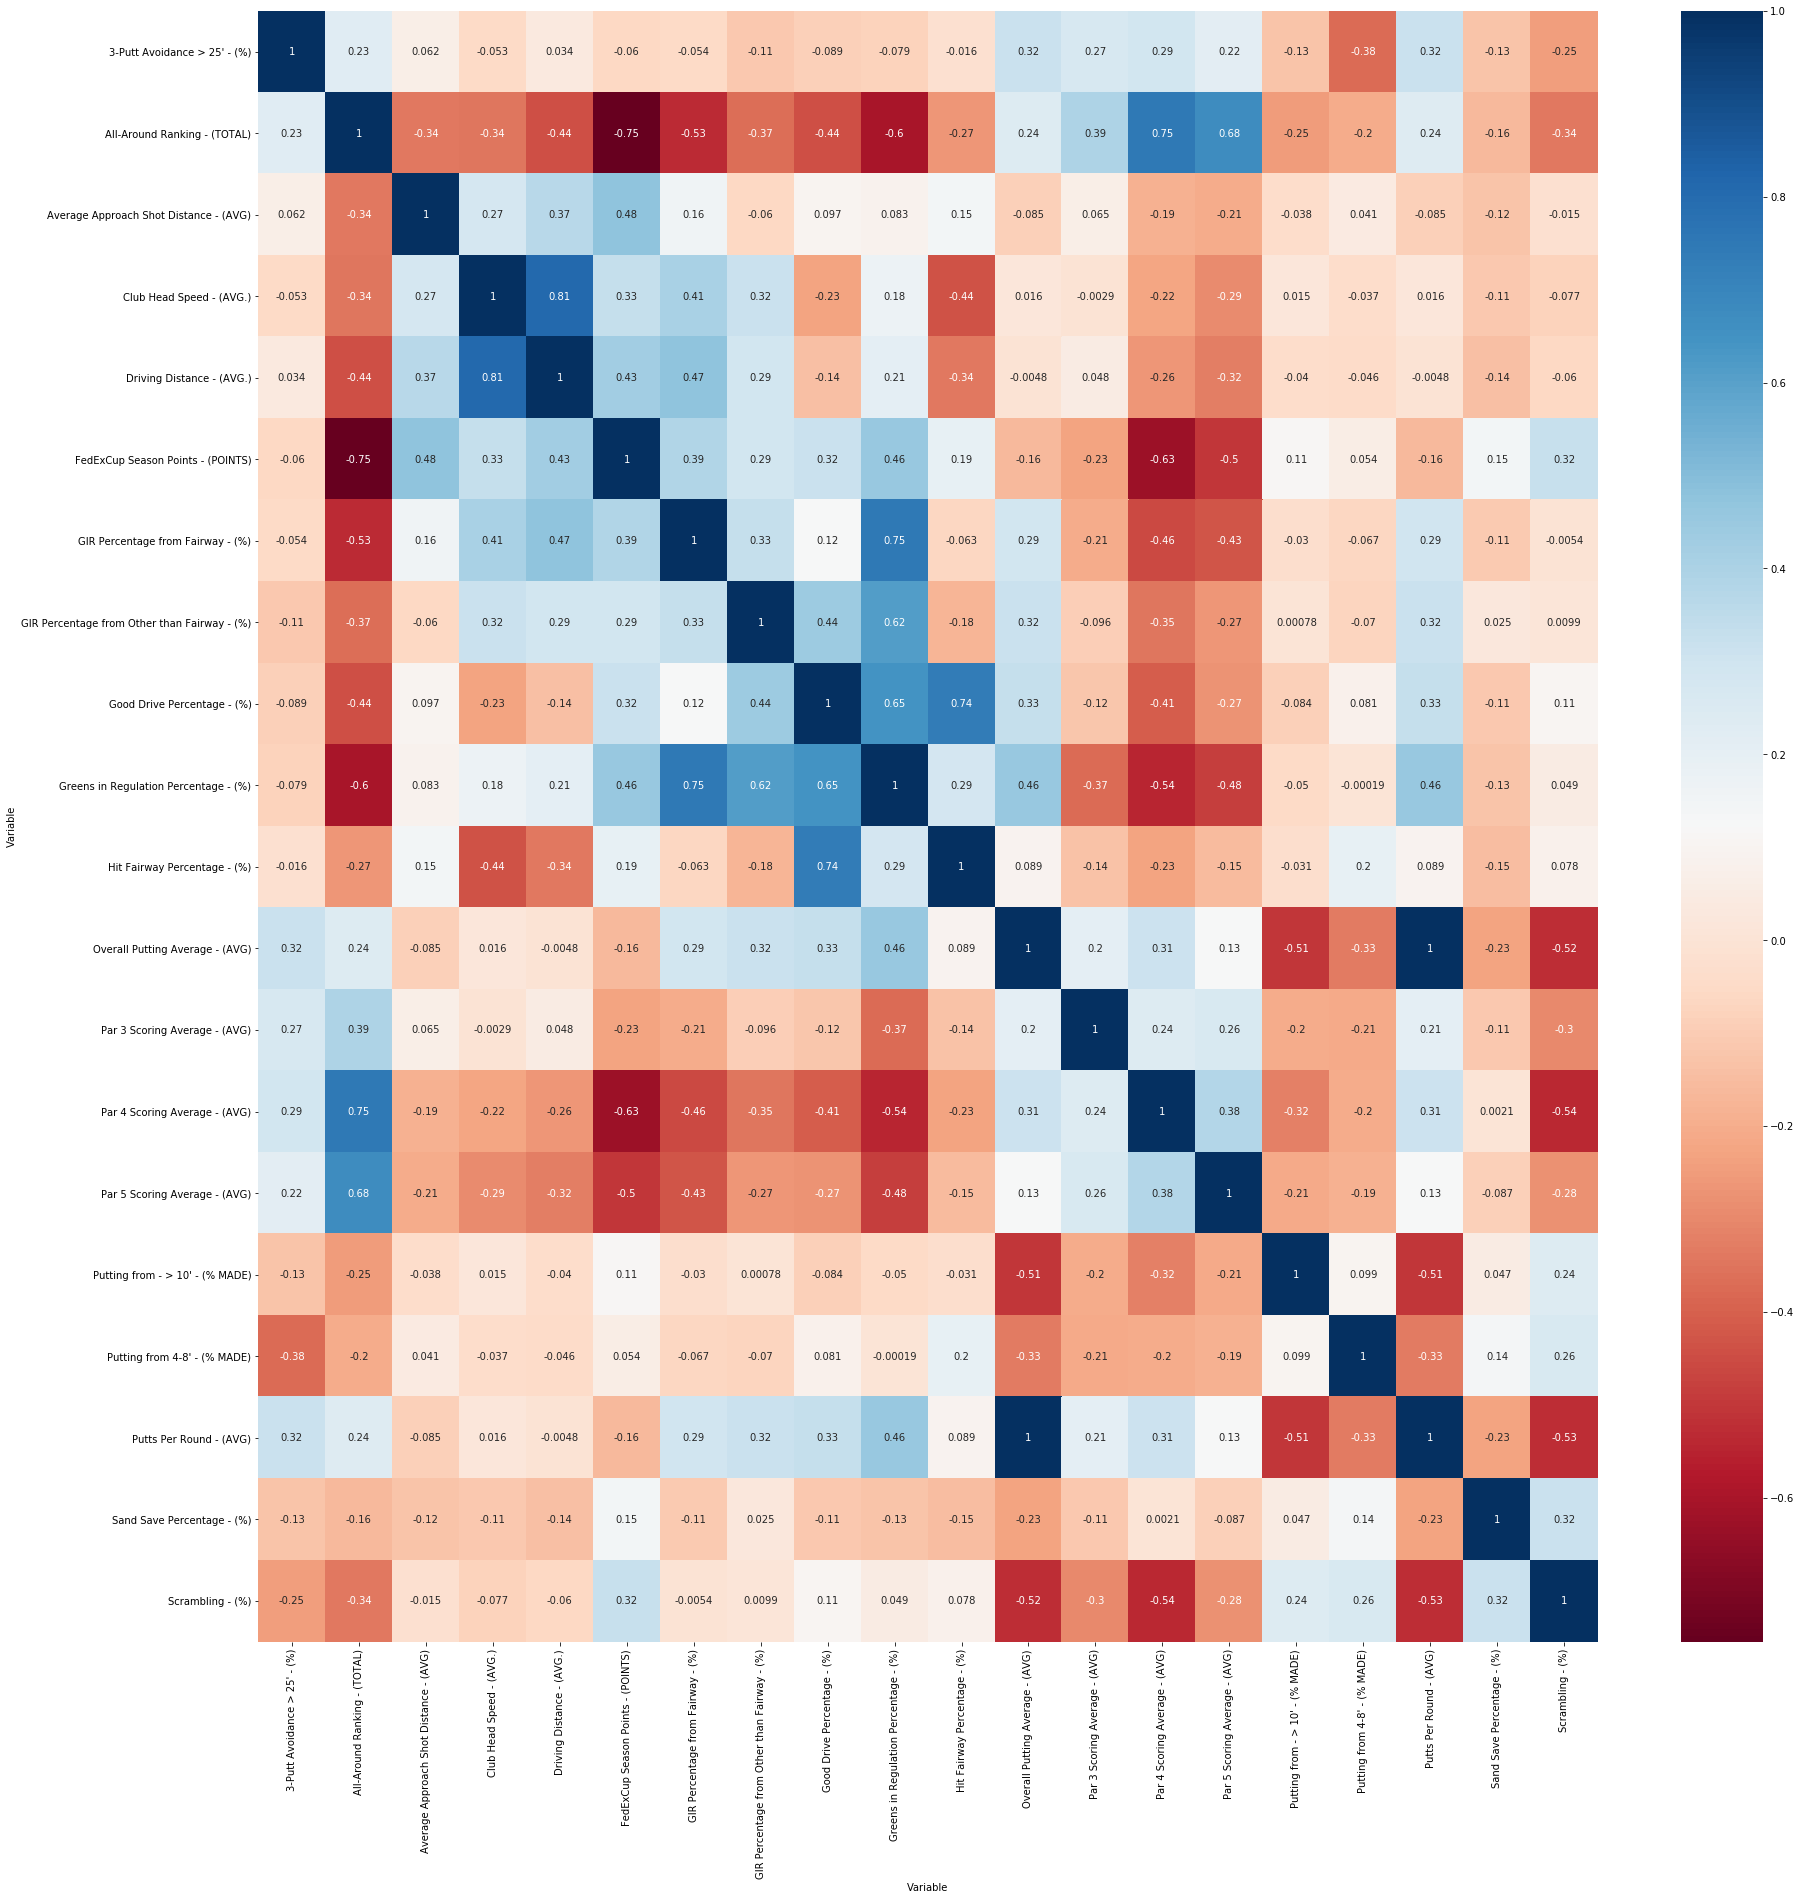

In [42]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

The heatmap above displays the correlation between each numerical variable in the dataset. Deeper blue colors represent stronger positive correlation, while deeper red colors represent stronger negative correlation. Recall that correlation has a maximum value of 1, and a minimum value of -1. A correlation of zero means that the two variables appear to have no correlation. I'll take a look at a couple of the more notable boxes.
* Par 3, 4, 5 scoring average and GIR %: These correlations are -0.37, -0.54, and -0.48 for par 3s, 4s, and 5s, respectively. This shows that players who hit a higher percentage of greens in regulation typically score lower, especially for par 4s and 5s.
* GIR % and scrambling %: While one might think that players who hit less greens in regulation would be better at scrambling, the correlation value of just 0.049 seems to show that this is not the case. 
* Par 3, 4, 5 scoring average and FedExCup points: These correlations are -0.23, -0.63, and -0.5 for par 3s, 4s, and 5s, respectively. As we are using FedExCup season points as a measure of success, we can see that par 4s seem to  matter the most, followed by par 5s, then par 3s. It makes sense that par 4 scoring matters most, given that most courses have a greater number of par 4s than par 5s. Interestingly, par 5 scoring seems to be much more important to a player's success than par 3 scoring.
* Club head speed and fairway %: There is a -0.44 correlation, which means that typically, as a player's club head speed increases, the percentage of fairways hit decreases.
* Club head speed and driving distance: This correlation is 0.81, which, as expected, shows that driving distance increases with increased club head speed. In fact, I expected this correlation to be even higher, given that players on the PGA Tour are all very efficient and consistent with their strike location.
* FedExCup points and % of putts made outside 10 feet & 3 putt avoidance outside 25 feet: The correlation for points and putts made outside 10 feet is 0.11, while for points and 3 putt avoidance it is only -0.06. These are both very low. It appears that in the grand scheme of a players performance that year, the percentage of longer putts made as well as 3 putt avoidance on lag putts does not seem to have that significant of an impact.

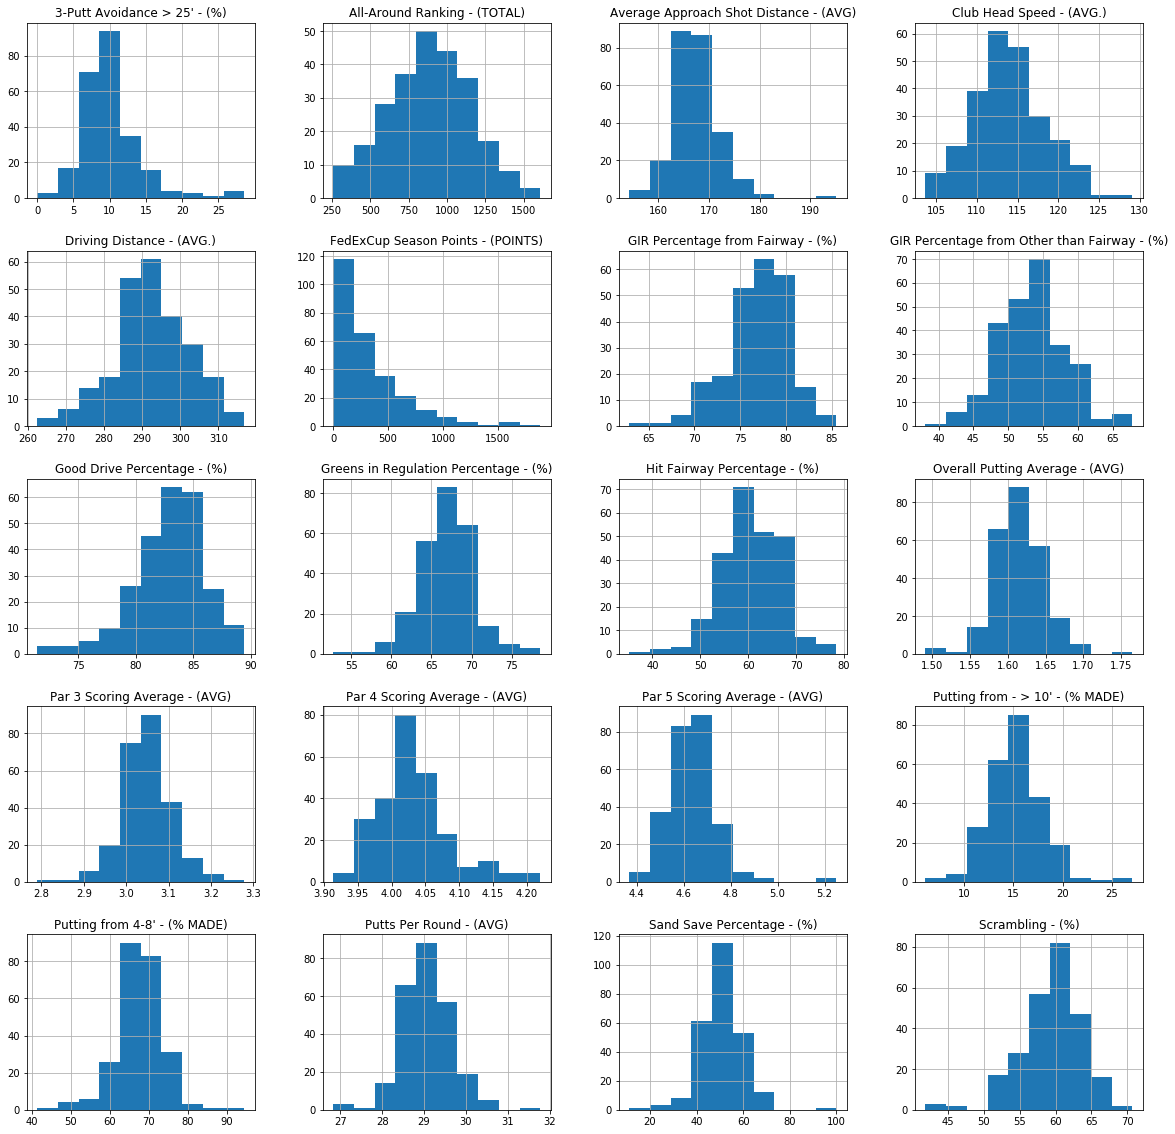

In [43]:
df.hist(column=keep_stats, figsize=(20,20))
plt.show()

From the histograms above, we can see that most of our variables are single peaked and appear to have little skew, except for the number of FedExCup points scored during the season, which is significantly right skewed. 

## Just for fun: an analysis of distance on the PGA Tour

In [34]:
fig = px.violin(df, y='Driving Distance - (AVG.)', box=True, points='all')
fig.update_layout(title_text='Distribution of Driving Distance', 
                  title_x=0.5)
fig.show()

Our violin plot shows the distribution of average driving distance on Tour. This result is rather expected, and we can see that most players hover around the average of 290 yards.

In [33]:
fig = px.scatter(df, x='Driving Distance - (AVG.)', y='Putts Per Round - (AVG)', trendline='ols')
fig.update_layout(title_text='Driving Distance vs. Putts Per Round', title_x=0.5)
fig.show()

Now this is a very interesting result. One might think that being a good putter might be a sign of compensating for distance, but the ordinary least squares regression line has a slope of nearly zero!